In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# scikit-learn
import sklearn

# 수치형 변환
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# PCA (차원 축소 : 주성분분석)
from sklearn.decomposition import PCA

# 문제지, 답안지 분리
from sklearn.model_selection import train_test_split

# 회귀 모델 (+ 통계)
# from sklearn.linear_model import LogisticRegression --> 분류 모델 / 회귀 XXXXXXXX
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 외부(Google) 회귀모델 (+ 별도설치 )
# import xgboost as xgb
# import lightgbm as lgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 정규화 / 스케일러
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 교차 검증 : StratifiedKFold (y를 고르게 폴드에 분배한다는 것은 회귀에서 없다) 
from sklearn.model_selection import KFold, cross_validate, GridSearchCV

# 회귀 평가 매트릭스
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import StackingRegressor

# matplotlib 차트 스타일을 seaborn 스타일로 설정
sns.set()

# ----------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [2]:
df = pd.read_csv('../data/train.csv')
df.head(5)

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [3]:
df = df.drop('id', axis=1)
df.columns = ['rs', 'al', 'vc', 'aq', 'is', 'lpl', 'ms', 'tdm', 'e', 'bpm']
df.head()

,rs,al,vc,aq,is,lpl,ms,tdm,e,bpm
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rs      524164 non-null  float64
 1   al      524164 non-null  float64
 2   vc      524164 non-null  float64
 3   aq      524164 non-null  float64
 4   is      524164 non-null  float64
 5   lpl     524164 non-null  float64
 6   ms      524164 non-null  float64
 7   tdm     524164 non-null  float64
 8   e       524164 non-null  float64
 9   bpm     524164 non-null  float64
dtypes: float64(10)
memory usage: 40.0 MB


# 이겨야한다 이상치 범인찾기 1탄

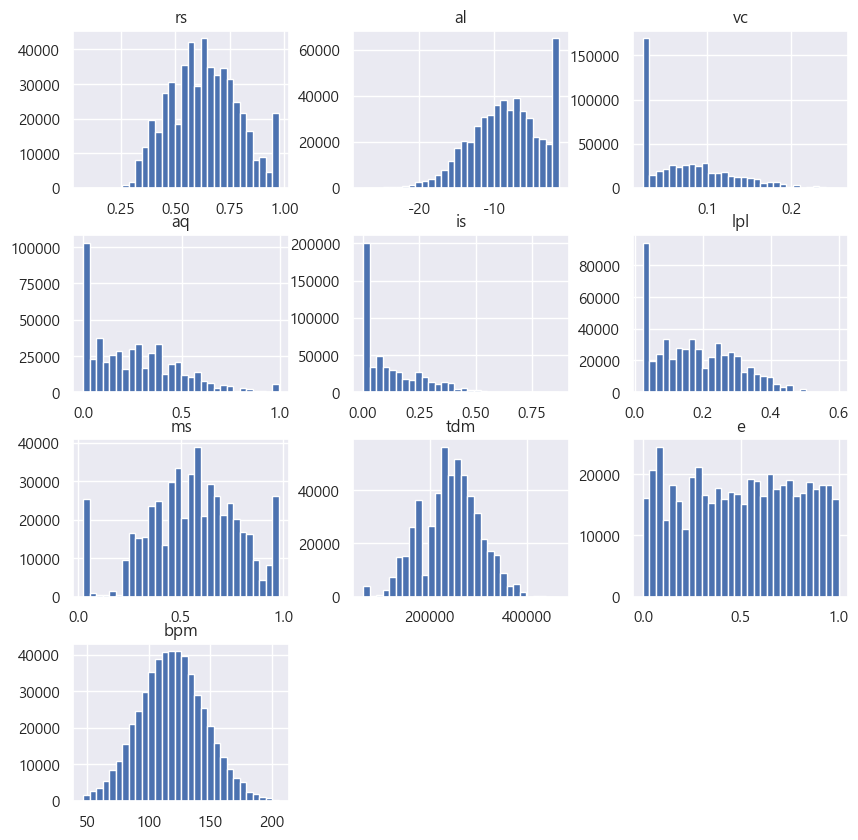

In [7]:
df.hist(figsize=(10, 10), bins=30)
plt.show()

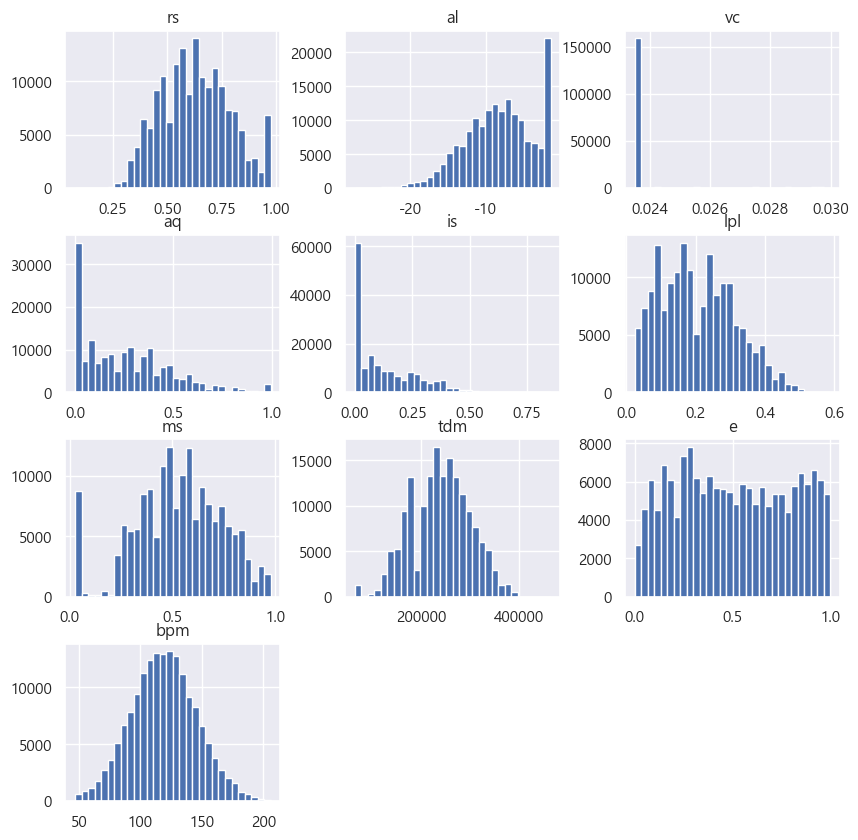

In [17]:
df[df['vc'] <= 0.03].hist(figsize=(10, 10), bins=30)
plt.show()

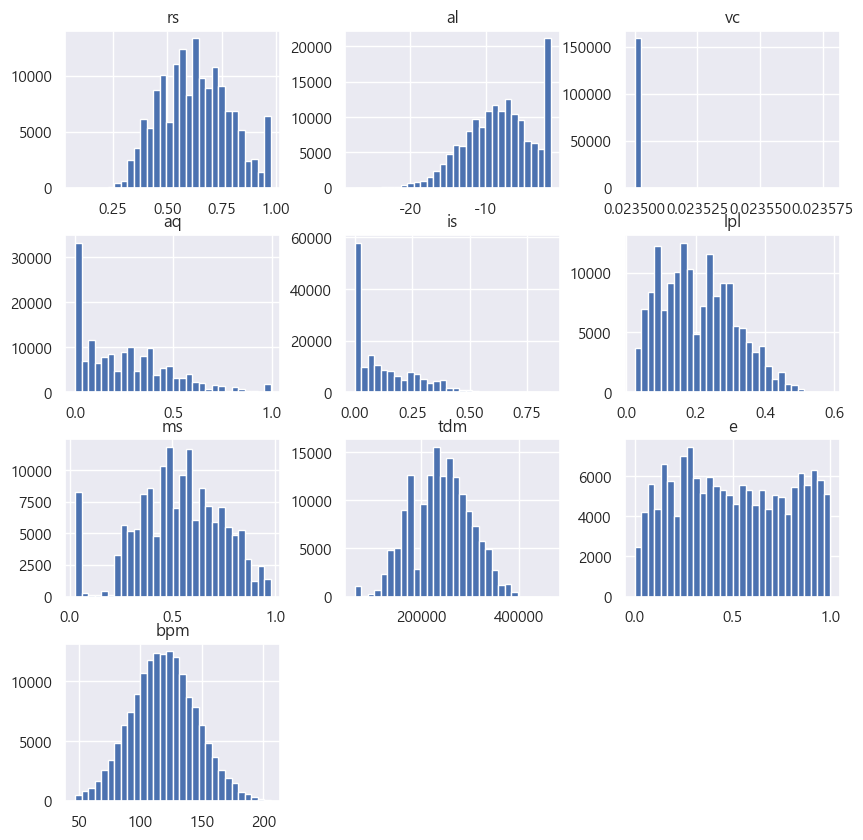

In [19]:
df[df['vc'] <= 0.0236].hist(figsize=(10, 10), bins=30)
plt.show()

In [23]:
df[df['vc'] <= 0.0236].sort_values(by='vc')

,rs,al,vc,aq,is,lpl,ms,tdm,e,bpm
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
348767,0.518960,-11.039760,0.023500,0.467555,0.105623,0.133559,0.374967,179975.4091,0.084333,55.56750
348768,0.837974,-11.697859,0.023500,0.232848,0.247083,0.142401,0.342389,258862.6939,0.717333,77.56569
348772,0.818290,-9.766301,0.023500,0.566255,0.000001,0.280034,0.607022,205581.6015,0.063133,114.93963
348775,0.394497,-14.769850,0.023500,0.011679,0.046906,0.160889,0.827572,262639.6188,0.974000,100.83067
...,...,...,...,...,...,...,...,...,...,...
515952,0.792999,-1.357000,0.023565,0.092464,0.121822,0.376787,0.275955,172941.3934,0.255733,153.13355
503016,0.671078,-10.712519,0.023565,0.592601,0.261475,0.252026,0.495523,271790.3989,0.020467,116.41495
319399,0.820869,-13.205874,0.023568,0.395056,0.147009,0.051746,0.558048,270838.0318,0.179067,98.08865
454836,0.703280,-8.816863,0.023569,0.304576,0.060297,0.308318,0.812310,233115.1976,0.158800,86.88573


In [27]:
bins = np.arange(0.023, 0.026 + 0.0001, 0.0001)
vc_bins = pd.cut(df['vc'], bins=bins, right=False)
vc_counts = vc_bins.value_counts().sort_index()
print(vc_counts)

vc
[0.023, 0.0231)          0
[0.0231, 0.0232)         0
[0.0232, 0.0233)         0
[0.0233, 0.0234)         0
[0.0234, 0.0235)         0
[0.0235, 0.0236)    158930
[0.0236, 0.0237)         0
[0.0237, 0.0238)         0
[0.0238, 0.0239)         0
[0.0239, 0.024)         25
[0.024, 0.0241)        256
[0.0241, 0.0242)       143
[0.0242, 0.0243)       200
[0.0243, 0.0244)       314
[0.0244, 0.0245)        62
[0.0245, 0.0246)        58
[0.0246, 0.0247)       192
[0.0247, 0.0248)        41
[0.0248, 0.0249)       133
[0.0249, 0.025)         80
[0.025, 0.0251)         31
[0.0251, 0.0252)        79
[0.0252, 0.0253)        91
[0.0253, 0.0254)       131
[0.0254, 0.0255)       220
[0.0255, 0.0256)       422
[0.0256, 0.0257)       164
[0.0257, 0.0258)       231
[0.0258, 0.0259)       122
[0.0259, 0.026)        112
Name: count, dtype: int64


In [28]:
bins = np.arange(0.0235, 0.0236 + 0.00001, 0.00001)
vc_bins = pd.cut(df['vc'], bins=bins, right=False)
vc_counts = vc_bins.value_counts().sort_index()
print(vc_counts)

vc
[0.0235, 0.02351)     158867
[0.02351, 0.02352)        16
[0.02352, 0.02353)        25
[0.02353, 0.02354)         1
[0.02354, 0.02355)        12
[0.02355, 0.02356)         0
[0.02356, 0.02357)         8
[0.02357, 0.02358)         1
[0.02358, 0.02359)         0
[0.02359, 0.0236)          0
Name: count, dtype: int64


In [29]:
bins = np.arange(0.02350, 0.02351 + 0.000001, 0.000001)
vc_bins = pd.cut(df['vc'], bins=bins, right=False)
vc_counts = vc_bins.value_counts().sort_index()
print(vc_counts)

vc
[0.0235, 0.023501)      158867
[0.023501, 0.023502)         0
[0.023502, 0.023503)         0
[0.023503, 0.023504)         0
[0.023504, 0.023505)         0
[0.023505, 0.023506)         0
[0.023506, 0.023507)         0
[0.023507, 0.023508)         0
[0.023508, 0.023509)         0
[0.023509, 0.02351)          0
[0.02351, 0.023511)          0
Name: count, dtype: int64


In [32]:
df[df['vc'].between(0.02350, 0.02351, inclusive='both')].sort_values(by='vc', ascending=True)

,rs,al,vc,aq,is,lpl,ms,tdm,e,bpm
0,0.603610,-7.636942,0.0235,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
348795,0.794316,-11.272639,0.0235,0.387925,0.076979,0.240147,0.955642,186956.3525,0.005467,130.48325
348798,0.910437,-15.193332,0.0235,0.064662,0.162254,0.065311,0.025600,156636.7260,0.777200,99.99136
348799,0.664443,-7.724891,0.0235,0.242408,0.000001,0.253914,0.652408,136442.9077,0.471267,123.19914
348800,0.769322,-8.976293,0.0235,0.226578,0.000001,0.098871,0.231929,234865.9843,0.298400,88.29890
...,...,...,...,...,...,...,...,...,...,...
174945,0.542152,-1.357000,0.0235,0.483734,0.362794,0.277929,0.395428,210868.7022,0.838667,145.56289
174946,0.532214,-8.974955,0.0235,0.000005,0.161349,0.396519,0.591484,250537.4667,0.865267,148.49977
174947,0.472350,-16.661160,0.0235,0.000005,0.363612,0.164380,0.415723,237329.2114,0.817133,68.80773
174937,0.486614,-10.450006,0.0235,0.281448,0.343826,0.282989,0.598093,282595.5443,0.125067,122.50511


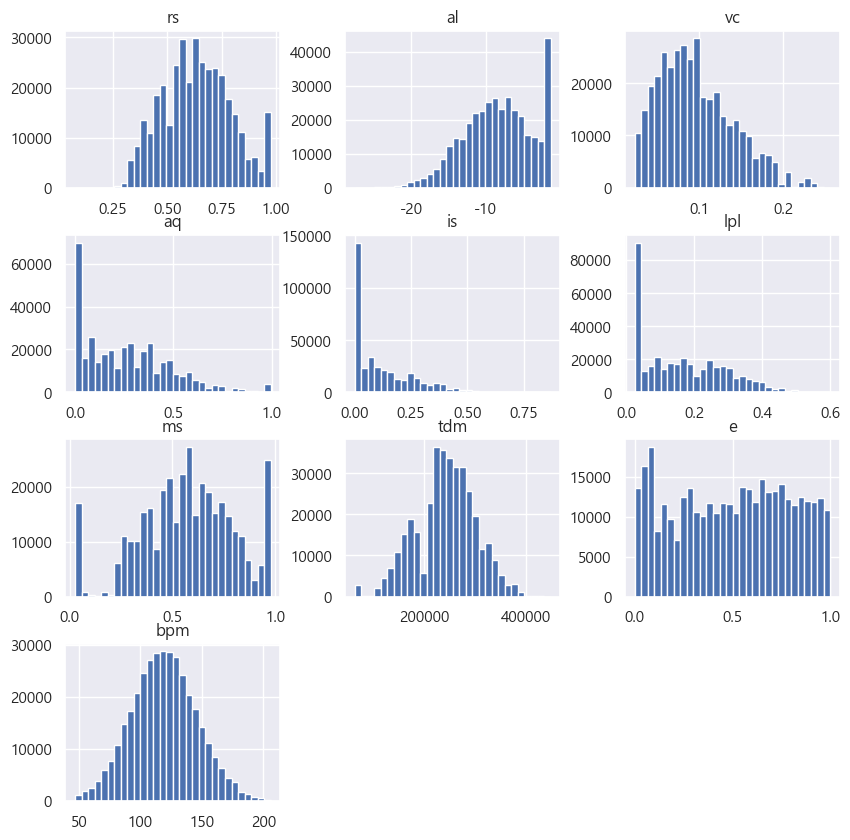

In [33]:
df = df[df['vc'] != 0.0235]
df.hist(figsize=(10, 10), bins=30)
plt.show()

# 이겨야한다 이상치 범인찾기 2탄

In [34]:
# bins = np.arange(0.023, 0.026 + 0.0001, 0.0001)
# vc_bins = pd.cut(df['aq'], bins=bins, right=False)
# vc_counts = vc_bins.value_counts().sort_index()
# print(vc_counts)

# ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ '딸깍'
* powertransformer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# --- 1. 샘플 데이터 준비 ---
# "정상" 데이터 포인트 클러스터 생성
rng = np.random.RandomState(42)
X_normal = 0.2 * rng.randn(200, 2)
# 일부러 이상치 데이터 추가
X_outliers = rng.uniform(low=-4, high=4, size=(40, 2))

# 정상 데이터와 이상치 데이터를 하나로 합침
X_total = np.r_[X_normal, X_outliers]
# 정상(0)과 이상치(1) 레이블 생성 (데이터 분할용이며, 모델 학습에는 사용되지 않음)
y_total = np.array([0] * 200 + [1] * 40)


# --- 2. 데이터 분할 (훈련/테스트) ---
# X80, X20, y80, y20 변수명을 사용하여 데이터를 나눔
X80, X20, y80, y20 = train_test_split(X_total, y_total, test_size=0.2, random_state=42)


# --- 3. 모델 초기화 및 학습 ---
# IsolationForest 모델 초기화.
# contamination: 데이터에서 예상되는 이상치의 비율. 'auto'로 시작하는 것이 좋음.
clf = IsolationForest(contamination='auto', random_state=42)

# 훈련 데이터(X80)로 모델을 학습시킴. y80은 사용되지 않음 (비지도 학습)
clf.fit(X80)


# --- 4. 테스트 데이터에서 이상치 예측 ---
# 학습된 모델을 사용하여 테스트 데이터(X20)에서 이상치를 예측함.
# 결과: 이상치는 -1, 정상 데이터는 1
y_pred_X20 = clf.predict(X20)


# --- 5. 결과 시각화 ---
# 테스트 데이터(X20)를 산점도로 시각화
# 예측 결과에 따라 점의 색을 다르게 표시
plt.figure(figsize=(10, 6))
plt.scatter(X20[:, 0], X20[:, 1], c=y_pred_X20, cmap='viridis')
plt.title("Isolation Forest 이상치 탐지 결과 (테스트 데이터)")
plt.xlabel("특성 1")
plt.ylabel("특성 2")
plt.colorbar(label="예측 (1: 정상, -1: 이상치)")
plt.grid(True)
plt.show()

# 탐지된 이상치의 개수 출력
n_outliers = (y_pred_X20 == -1).sum()
print(f"테스트 데이터에서 탐지된 이상치 개수: {n_outliers}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# 분석할 숫자형 특성들 선택
# 예시: df가 이미 있고, 모든 열이 숫자형이라고 가정
# num_features = df.columns
num_features = df.select_dtypes(include=np.number).columns.tolist()


# 1. 전체 그림의 크기와 격자(grid) 설정
n_features = len(num_features)
n_cols = 4  # 한 줄에 그릴 그래프의 개수 (원하는 대로 조절)
n_rows = math.ceil(n_features / n_cols) # 필요한 줄의 개수 자동 계산

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2차원 배열을 1차원으로 변환하여 다루기 쉽게 함

# 2. for문을 사용하여 각 subplot에 boxplot 그리기
for i, col in enumerate(num_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. 남는 빈 subplot들은 보이지 않게 처리
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. 전체 그림을 보기 좋게 조정하고 출력
plt.tight_layout()
plt.show()

In [ ]:
# IQR 기반 이상치 행 삭제 코드

import pandas as pd
import numpy as np

# 1. 원본 DataFrame을 안전하게 복사
df_trimmed = df.copy()

# 2. 이상치를 확인할 숫자형 특성(feature)들의 리스트
# 예시: num_features = ['age', 'income', 'score']
# 이 리스트는 실제 데이터에 맞게 수정해야 합니다.
num_features = df_trimmed.select_dtypes(include=np.number).columns.tolist()

# 3. 각 숫자형 특성에 대해 이상치 행 삭제
for col in num_features:
    Q1 = df_trimmed[col].quantile(0.25)
    Q3 = df_trimmed[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 정상 범위에 있는 행만 남김
    df_trimmed = df_trimmed[(df_trimmed[col] >= lower_bound) & (df_trimmed[col] <= upper_bound)]

# 4. 결과 확인
print("Original DataFrame Shape:", df.shape)
print("Trimmed DataFrame Shape:", df_trimmed.shape)

In [ ]:
# IQR 기반 이상치 대체(Winsorization) 코드

import pandas as pd
import numpy as np

# 1. 원본 DataFrame을 안전하게 복사
df_winsorized = df.copy()

# 2. 이상치를 확인할 숫자형 특성(feature)들의 리스트
# 이 리스트는 실제 데이터에 맞게 수정해야 합니다.
num_features = df_winsorized.select_dtypes(include=np.number).columns.tolist()

# 3. 복사본(df_winsorized)의 이상치를 경계값으로 대체
for col in num_features:
    Q1 = df_winsorized[col].quantile(0.25)
    Q3 = df_winsorized[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Winsorization (capping)
    df_winsorized[col] = np.where(df_winsorized[col] < lower_bound, lower_bound,
                                  np.where(df_winsorized[col] > upper_bound, upper_bound, df_winsorized[col]))

# 4. 결과 확인
print("Original DataFrame Shape:", df.shape)
print("Winsorized DataFrame Shape:", df_winsorized.shape)
# df_winsorized.describe() # 데이터가 어떻게 변했는지 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# 분석할 숫자형 특성들 선택
# 예시: df가 이미 있고, 모든 열이 숫자형이라고 가정
# num_features = df.columns
num_features = df_trimmed.select_dtypes(include=np.number).columns.tolist()


# 1. 전체 그림의 크기와 격자(grid) 설정
n_features = len(num_features)
n_cols = 4  # 한 줄에 그릴 그래프의 개수 (원하는 대로 조절)
n_rows = math.ceil(n_features / n_cols) # 필요한 줄의 개수 자동 계산

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2차원 배열을 1차원으로 변환하여 다루기 쉽게 함

# 2. for문을 사용하여 각 subplot에 boxplot 그리기
for i, col in enumerate(num_features):
    sns.boxplot(x=df_trimmed[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. 남는 빈 subplot들은 보이지 않게 처리
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. 전체 그림을 보기 좋게 조정하고 출력
plt.tight_layout()
plt.show()

In [ ]:
num_features = df_winsorized.select_dtypes(include=np.number).columns.tolist()


# 1. 전체 그림의 크기와 격자(grid) 설정
n_features = len(num_features)
n_cols = 4  # 한 줄에 그릴 그래프의 개수 (원하는 대로 조절)
n_rows = math.ceil(n_features / n_cols) # 필요한 줄의 개수 자동 계산

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2차원 배열을 1차원으로 변환하여 다루기 쉽게 함

# 2. for문을 사용하여 각 subplot에 boxplot 그리기
for i, col in enumerate(num_features):
    sns.boxplot(x=df_winsorized[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. 남는 빈 subplot들은 보이지 않게 처리
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. 전체 그림을 보기 좋게 조정하고 출력
plt.tight_layout()
plt.show()

In [ ]:
dfw = df_winsorized
dfw.hist(figsize=(10, 10))
plt.show()

# 파이프 라인

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

In [ ]:
y = dfw['bpm']
X = dfw.drop('bpm', axis=1)

from scipy.stats import skew,  kurtosis
s = pd.Series( skew(X) , index=X.columns)
k = pd.Series( kurtosis(X), index=X.columns)
print(s,'\n',k)

In [ ]:
X80,X20,y80,y20 = train_test_split(X, y, test_size=0.2, random_state=8989)
X80.shape, y80.shape, X20.shape, y20.shape

In [ ]:
model = XGBRegressor()

model.fit(X80,y80)
pred = model.predict(X20)
mse = mean_squared_error(y20, pred)
print(mse)

In [ ]:
tran_pipe = TransformedTargetRegressor (
                Pipeline([ ('my_log1p', FunctionTransformer(np.log1p, validate=True)), 
                           ('my_scaler', StandardScaler()),
                           ('my_model', XGBRegressor())
                       ]),
                func=np.log1p, 
                inverse_func=np.expm1
)
tran_pipe.fit(X80, y80)
pred = tran_pipe.predict(X20)
#############  pred = np.expm1(pred_log)
mse = mean_squared_error(y20, pred)
print(mse)

In [ ]:
dfw.columns

In [ ]:
# 로그 변환 대상
log_features = ['vc', 'aq', 'is']

# 1️⃣ 피처 변환 파이프라인
feature_pipe = ColumnTransformer([
    ('log_transform', FunctionTransformer(np.log1p, validate=True), log_features),
    ('pass', 'passthrough', [col for col in X80.columns if col not in log_features])
])

# 2️⃣ 전체 모델 파이프라인
model = Pipeline([
    ('feature_pipe', feature_pipe),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor())
])

# 3️⃣ 타깃 로그변환 + 역변환 자동 적용
tran_pipe = TransformedTargetRegressor(
    regressor=model,
    func=np.log1p,
    inverse_func=np.expm1
)

# 4️⃣ 학습
tran_pipe.fit(X80, y80)

# 5️⃣ 예측 (inverse 자동 적용됨)
pred = tran_pipe.predict(X20)

# 6️⃣ 평가
mse = mean_squared_error(y20, pred)
print("MSE:", mse)

In [ ]:
# 로그 스케일러 변환 후 mse 값 오히려 안좋아졌기에 제외

In [ ]:
# ====================================
# 2️⃣ Base models (XGB + LGBM)
# ====================================
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist',  # ✅ GPU 학습
    predictor='gpu_predictor'
)

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    device='gpu'
)

# ====================================
# 3️⃣ Meta model (stacking layer)
# ====================================
# 보통 간단한 Ridge나 LinearRegression 사용
meta_model = RidgeCV(alphas=np.logspace(-3, 3, 7))
#후보 alpha: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# ====================================
# 4️⃣ Stacking Regressor
# ====================================
stack_model = StackingRegressor(
    estimators=[
        ("xgb", xgb),
        ("lgbm", lgbm)
    ],
    final_estimator=meta_model,
    passthrough=False,  # base 모델 입력을 meta model에 추가할지 여부
    n_jobs=-1
)

# ====================================
# 6️⃣ 학습 및 평가
# ====================================
stack_model.fit(X80, y80)
pred = stack_model.predict(X20)

mse = mean_squared_error(y20, pred)
print("Stacking MSE:", mse)

In [ ]:
dfw['tdM'] = dfw['tdm'] / 60000
dfw['ear'] = dfw['e'] / (df['aq'] + 1e-5)
dfw['vib'] = dfw['vc'] / (df['is'] + 1e-5)
dfw['mr'] = dfw['ms'] * df['rs']
dfw['pi'] = dfw['lpl'] * df['al']
dfw['re'] = dfw['rs'] * df['e']
dfw['ma'] = dfw['ms'] * df['aq']

In [ ]:
dfw.head()

In [ ]:
y = dfw['bpm']
X = dfw.drop('bpm', axis=1)

from scipy.stats import skew,  kurtosis
s = pd.Series( skew(X) , index=X.columns)
k = pd.Series( kurtosis(X), index=X.columns)
print(s,'\n',k)

In [ ]:
X80,X20,y80,y20 = train_test_split(X, y, test_size=0.2, random_state=8989)
X80.shape, y80.shape, X20.shape, y20.shape

In [ ]:
model = XGBRegressor()

model.fit(X80,y80)
pred = model.predict(X20)
mse = mean_squared_error(y20, pred)
print(mse)

In [ ]:
tran_pipe = TransformedTargetRegressor (
                Pipeline([ ('my_log1p', FunctionTransformer(np.log1p, validate=True)), 
                           ('my_scaler', StandardScaler()),
                           ('my_model', XGBRegressor())
                       ]),
                func=np.log1p, 
                inverse_func=np.expm1
)
tran_pipe.fit(X80, y80)
pred = tran_pipe.predict(X20)
#############  pred = np.expm1(pred_log)
mse = mean_squared_error(y20, pred)
print(mse)

In [ ]:
dfw.columns

In [ ]:
# 로그 변환 대상
log_features = ['vc', 'aq', 'is','ear','vib','pi']

# 1️⃣ 피처 변환 파이프라인
feature_pipe = ColumnTransformer([
    ('log_transform', FunctionTransformer(np.log1p, validate=True), log_features),
    ('pass', 'passthrough', [col for col in X80.columns if col not in log_features])
])

# 2️⃣ 전체 모델 파이프라인
model = Pipeline([
    ('feature_pipe', feature_pipe),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor())
])

# 3️⃣ 타깃 로그변환 + 역변환 자동 적용
tran_pipe = TransformedTargetRegressor(
    regressor=model,
    func=np.log1p,
    inverse_func=np.expm1
)

# 4️⃣ 학습
tran_pipe.fit(X80, y80)

# 5️⃣ 예측 (inverse 자동 적용됨)
pred = tran_pipe.predict(X20)

# 6️⃣ 평가
mse = mean_squared_error(y20, pred)
print("MSE:", mse)

In [ ]:
# ====================================
# 2️⃣ Base models (XGB + LGBM)
# ====================================
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist',  # ✅ GPU 학습
    predictor='gpu_predictor'
)

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    device='gpu'
)

# ====================================
# 3️⃣ Meta model (stacking layer)
# ====================================
# 보통 간단한 Ridge나 LinearRegression 사용
meta_model = RidgeCV(alphas=np.logspace(-3, 3, 7))
#후보 alpha: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# ====================================
# 4️⃣ Stacking Regressor
# ====================================
stack_model = StackingRegressor(
    estimators=[
        ("xgb", xgb),
        ("lgbm", lgbm)
    ],
    final_estimator=meta_model,
    passthrough=False,  # base 모델 입력을 meta model에 추가할지 여부
    n_jobs=-1
)

# ====================================
# 6️⃣ 학습 및 평가
# ====================================
stack_model.fit(X80, y80)
pred = stack_model.predict(X20)

mse = mean_squared_error(y20, pred)
print("Stacking MSE:", mse)

In [ ]:
# ====================================
# 1️⃣ Feature Engineering
# ====================================
def create_features(df):
    """새로운 피처 생성"""
    df_new = df.copy()
    
    # 상호작용 피처
    df_new['energy_loudness'] = df_new['e'] * abs(df_new['al'])
    df_new['rhythm_energy'] = df_new['rs'] * df_new['e']
    df_new['vocal_acoustic'] = df_new['vc'] * df_new['aq']
    
    # 비율 피처
    df_new['instrumental_vocal_ratio'] = df_new['is'] / (df_new['vc'] + 1e-6)
    df_new['mood_energy_ratio'] = df_new['ms'] / (df_new['e'] + 1e-6)
    
    # 다항 피처
    df_new['energy_squared'] = df_new['e'] ** 2
    df_new['rhythm_squared'] = df_new['rs'] ** 2
    
    # 시간 관련 피처
    df_new['tdm_minutes'] = df_new['tdm'] / 60000
    df_new['tdm_log'] = np.log1p(df_new['tdm'])
    
    # 음량 절대값
    df_new['al_abs'] = abs(df_new['al'])
    
    return df_new

# ====================================
# 2️⃣ 데이터 준비 (이상치 제거 버전)
# ====================================
y = dfw['bpm']
X = dfw.drop('bpm', axis=1)

# Feature Engineering 적용
X_engineered = create_features(X)

# Train/Test Split
X80, X20, y80, y20 = train_test_split(
    X_engineered, y, 
    test_size=0.2, 
    random_state=8989
)

print(f"Original features: {X.shape[1]}")
print(f"Engineered features: {X_engineered.shape[1]}")

# ====================================
# 3️⃣ 모델 1: XGBoost with Hyperparameter Tuning
# ====================================
from sklearn.model_selection import RandomizedSearchCV

xgb_params = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

xgb_model = XGBRegressor(
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist',  # ✅ GPU 학습
    predictor='gpu_predictor'
)

# RandomizedSearch (시간 절약)
xgb_search = RandomizedSearchCV(
    xgb_model,
    xgb_params,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\n🔍 XGBoost Hyperparameter Tuning...")
xgb_search.fit(X80, y80)
best_xgb = xgb_search.best_estimator_

pred_xgb = best_xgb.predict(X20)
mse_xgb = mean_squared_error(y20, pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y20, pred_xgb)

print(f"✅ XGBoost Best Params: {xgb_search.best_params_}")
print(f"   MSE: {mse_xgb:.2f}")
print(f"   RMSE: {rmse_xgb:.2f}")
print(f"   R²: {r2_xgb:.4f}")

# ====================================
# 4️⃣ 모델 2: LightGBM
# ====================================
lgbm_params = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63, 127],
    'max_depth': [6, 8, 10, -1],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

lgbm_model = LGBMRegressor(
    random_state=42,
    n_jobs=-1,
    verbose=-1,
    device='gpu'
)

lgbm_search = RandomizedSearchCV(
    lgbm_model,
    lgbm_params,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\n🔍 LightGBM Hyperparameter Tuning...")
lgbm_search.fit(X80, y80)
best_lgbm = lgbm_search.best_estimator_

pred_lgbm = best_lgbm.predict(X20)
mse_lgbm = mean_squared_error(y20, pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y20, pred_lgbm)

print(f"✅ LightGBM Best Params: {lgbm_search.best_params_}")
print(f"   MSE: {mse_lgbm:.2f}")
print(f"   RMSE: {rmse_lgbm:.2f}")
print(f"   R²: {r2_lgbm:.4f}")

# ====================================
# 5️⃣ 앙상블: Weighted Average
# ====================================
# 더 성능 좋은 모델에 더 큰 가중치
if mse_xgb < mse_lgbm:
    w_xgb, w_lgbm = 0.6, 0.4
else:
    w_xgb, w_lgbm = 0.4, 0.6

pred_ensemble = w_xgb * pred_xgb + w_lgbm * pred_lgbm
mse_ensemble = mean_squared_error(y20, pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y20, pred_ensemble)

print(f"\n✅ Ensemble (Weighted Average)")
print(f"   Weights: XGB={w_xgb}, LGBM={w_lgbm}")
print(f"   MSE: {mse_ensemble:.2f}")
print(f"   RMSE: {rmse_ensemble:.2f}")
print(f"   R²: {r2_ensemble:.4f}")

# ====================================
# 6️⃣ Feature Importance 분석
# ====================================
feature_importance = pd.DataFrame({
    'feature': X_engineered.columns,
    'xgb_importance': best_xgb.feature_importances_,
    'lgbm_importance': best_lgbm.feature_importances_
})
feature_importance['avg_importance'] = (
    feature_importance['xgb_importance'] + 
    feature_importance['lgbm_importance']
) / 2
feature_importance = feature_importance.sort_values('avg_importance', ascending=False)

print("\n📊 Top 10 Important Features:")
print(feature_importance.head(10)[['feature', 'avg_importance']])

# ====================================
# 7️⃣ 시각화
# ====================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 예측값 vs 실제값
axes[0].scatter(y20, pred_ensemble, alpha=0.3, s=1)
axes[0].plot([y20.min(), y20.max()], [y20.min(), y20.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual BPM')
axes[0].set_ylabel('Predicted BPM')
axes[0].set_title(f'Ensemble Predictions (R²={r2_ensemble:.4f})')

# Feature Importance
top_features = feature_importance.head(10)
axes[1].barh(top_features['feature'], top_features['avg_importance'])
axes[1].set_xlabel('Average Importance')
axes[1].set_title('Top 10 Feature Importance')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# ====================================
# 8️⃣ 최종 결과 요약
# ====================================
results = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM', 'Ensemble'],
    'MSE': [mse_xgb, mse_lgbm, mse_ensemble],
    'RMSE': [rmse_xgb, rmse_lgbm, rmse_ensemble],
    'R²': [r2_xgb, r2_lgbm, r2_ensemble]
})
print("\n📈 Final Results Summary:")
print(results.to_string(index=False))